In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("paper")

In [3]:
def latex2figSize(width: float, fraction: float=1, ratio=16/9):
    """Set figure dimensions to avoid scaling in LaTeX.
    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in / ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [5]:
LATEX_WIDTH = 517.935 # pt Beamer
figSize = latex2figSize(LATEX_WIDTH, 0.5, ratio=16/9)

fontsize = 8
fontsize_small = 6
fontsize_smaller = 6

sns.set_theme(style="whitegrid", font="sans-serif", rc={
    "figure.figsize": figSize,
    "figure.autolayout": True,
    "text.usetex": True,
    "font.family": "serif",
    "axes.labelsize": fontsize,
    "font.size": fontsize_small,
    "legend.fontsize": fontsize_smaller,
    "xtick.labelsize": fontsize_small,
    "ytick.labelsize": fontsize_small,
    "lines.linewidth": 1
})

custom_markers = {
    "markeredgewidth": 0.2,
    "markeredgecolor": "white",
    "markersize": 4
}

In [4]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.8',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis': 'both',


In [47]:
openmp_scaling_df = pd.read_csv("C:\\Users\\xjose\\Desktop\\BACKUP\\Models\\openmp_scaling.csv", sep=",")
hybrid_scaling_df = pd.read_csv("C:\\Users\\xjose\\Desktop\\BACKUP\\Models\\hybrid_scaling.csv", sep=",")
mpi_scaling_df = pd.read_csv("C:\\Users\\xjose\\Desktop\\BACKUP\\Models\\mpi_scaling.csv", sep=",")

In [48]:
dfs = [openmp_scaling_df, hybrid_scaling_df, mpi_scaling_df]
idx = [15, 15, 18]
mpi_scaling_df[mpi_scaling_df["Dataset"]=="Bridge"]

,Dataset,Workers,Vectorized runtime,Non vectorized runtime,Standard deviation vectorized HPDBSCAN,Standard deviation non vectorized HPDBSCAN
36,Bridge,1,4477.380410,4221.208843,0.0,0.0
37,Bridge,32,2026.822972,2039.751703,0.0,0.0
38,Bridge,64,1689.889761,1866.268604,0.0,0.0
39,Bridge,96,1536.291897,1692.943242,0.0,0.0
40,Bridge,128,1488.428443,1597.547884,0.0,0.0
41,Bridge,160,1422.909725,1498.617305,0.0,0.0
42,Bridge,192,1326.093945,1446.566764,0.0,0.0
43,Bridge,224,1365.828056,1406.322066,0.0,0.0
44,Bridge,256,1278.608001,1420.005284,0.0,0.0
45,Bridge,288,1345.363100,1377.826327,0.0,0.0


In [99]:
new_dfs = []
for df, i in zip(dfs, idx):
    bremen_mask = df["Dataset"] == "Bremen"
    household_mask = df["Dataset"] == "Household"
    bridge_mask = df["Dataset"] == "Bridge"
    runtime_1_worker_vec = df.loc[bridge_mask & (df["Workers"] == 1), "Vectorized runtime"].tolist()[0]
    runtime_1_worker_nvec = df.loc[bridge_mask & (df["Workers"] == 1), "Non vectorized runtime"].tolist()[0]

    runtime_1_worker_vec_household = df.loc[household_mask & (df["Workers"] == 1), "Vectorized runtime"].tolist()[0]
    runtime_1_worker_nvec_household = df.loc[household_mask & (df["Workers"] == 1), "Non vectorized runtime"].tolist()[0]

    runtime_1_worker_vec_bremen = df.loc[bremen_mask & (df["Workers"] == 1), "Vectorized runtime"].tolist()[0]
    runtime_1_worker_nvec_bremen = df.loc[bremen_mask & (df["Workers"] == 1), "Non vectorized runtime"].tolist()[0]
    #print("Value of runtime_1_worker_nvec ", runtime_1_worker_vec.tolist()[0])
    #print(runtime_1_worker_vec)

    df["Speedup nv"] = 0.0
    df["Speedup v"] = 0.0
    df.loc[bremen_mask, "Speedup nv"] = runtime_1_worker_nvec_bremen / df.loc[bremen_mask, "Non vectorized runtime"] 
    df.loc[bremen_mask, "Speedup v"] = runtime_1_worker_vec_bremen / df.loc[bremen_mask, "Vectorized runtime"] 
    df.loc[household_mask, "Speedup nv"] = runtime_1_worker_nvec_household / df.loc[household_mask, "Non vectorized runtime"] 
    df.loc[household_mask, "Speedup v"] = runtime_1_worker_vec_household / df.loc[household_mask, "Vectorized runtime"]
    df.loc[bridge_mask, "Speedup nv"] = runtime_1_worker_nvec / df.loc[bridge_mask, "Non vectorized runtime"] 
    df.loc[bridge_mask, "Speedup v"] = runtime_1_worker_vec / df.loc[bridge_mask, "Vectorized runtime"]

    non_vect = df.loc[:,["Dataset", "Workers", "Non vectorized runtime", "Standard deviation non vectorized HPDBSCAN", "Speedup nv"]]
    non_vect.rename(columns={"Non vectorized runtime": "Runtime [$s$]", "Standard deviation non vectorized HPDBSCAN": "Std $\sigma$", "Speedup nv": "Speedup"}, inplace=True)
    non_vect["Optimization"] = "Not vectorized"
    vect = df.loc[:,["Dataset", "Workers", "Vectorized runtime", "Standard deviation vectorized HPDBSCAN", "Speedup v"]]
    vect["Optimization"] = "Vectorized"
    vect.rename(columns={"Vectorized runtime": "Runtime [$s$]", "Standard deviation vectorized HPDBSCAN": "Std $\sigma$", "Speedup v": "Speedup"}, inplace=True)
    new_df = pd.concat([non_vect, vect])
    new_df["log runtime"] = np.log10(new_df["Runtime [$s$]"])
    new_dfs.append(new_df)
openmp_scaling_df, hybrid_scaling_df, mpi_scaling_df = new_dfs
mpi_scaling_df[mpi_scaling_df["Dataset"] == "Bremen"]



,Dataset,Workers,Runtime [$s$],Std $\sigma$,Speedup,Optimization,log runtime
0,Bremen,1,13331.088110,29.782250,1.000000,Not vectorized,4.124866
1,Bremen,32,475.681965,1.112840,28.025212,Not vectorized,2.677317
2,Bremen,64,260.246466,0.650739,51.224857,Not vectorized,2.415385
3,Bremen,96,183.356602,0.564668,72.705798,Not vectorized,2.263297
4,Bremen,128,141.543904,0.382023,94.183414,Not vectorized,2.150891
5,Bremen,160,120.361469,0.251921,110.758769,Not vectorized,2.080487
6,Bremen,192,109.559108,0.343406,121.679414,Not vectorized,2.039648
7,Bremen,224,95.618663,0.245296,139.419312,Not vectorized,1.980543
8,Bremen,256,87.979362,0.388910,151.525174,Not vectorized,1.944381
9,Bremen,288,81.305172,0.440372,163.963592,Not vectorized,1.910118


In [61]:
mpi_scaling_df[mpi_scaling_df["Dataset"] == "Bridge"]

,Dataset,Workers,Runtime [$s$],Std $\sigma$,Speedup,Optimization,log runtime
36,Bridge,1,4221.208843,0.0,1.000000,Not vectorized,3.625437
37,Bridge,32,2039.751703,0.0,2.069472,Not vectorized,3.309577
38,Bridge,64,1866.268604,0.0,2.261844,Not vectorized,3.270974
39,Bridge,96,1692.943242,0.0,2.493414,Not vectorized,3.228642
40,Bridge,128,1597.547884,0.0,2.642305,Not vectorized,3.203454
41,Bridge,160,1498.617305,0.0,2.816736,Not vectorized,3.175691
42,Bridge,192,1446.566764,0.0,2.918088,Not vectorized,3.160338
43,Bridge,224,1406.322066,0.0,3.001595,Not vectorized,3.148085
44,Bridge,256,1420.005284,0.0,2.972671,Not vectorized,3.152290
45,Bridge,288,1377.826327,0.0,3.063673,Not vectorized,3.139194


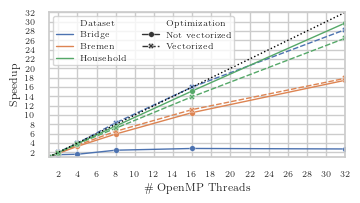

In [111]:
power_2 = [2**x for x in range(10)]
fig, axs = plt.subplots(1, 1, figsize=(figSize[0], figSize[1] ))
filter = openmp_scaling_df["Workers"].isin(power_2)
sns.lineplot(data=openmp_scaling_df[filter], x="Workers", y="Speedup", hue="Dataset", markers=True, style="Optimization", ax=axs, **custom_markers)

#ticks=[2**x for x in range(0, 8)]
ticks=[2*x for x in range(0, 48)]
plt.plot(ticks, ticks, linestyle=':', color="black", linewidth=1)
#plt.yscale('log', base=2)
#plt.xscale('log', base=2)

axs.set_xlabel("\# OpenMP Threads")
axs.set_xticks(ticks)
axs.set_yticks(ticks)
axs.set_xticklabels(ticks)
axs.set_yticklabels(ticks)
axs.set_xlim(1, 32)
axs.set_ylim(1, 32)


plt.legend(ncols=2, loc='upper left')
plt.tight_layout()
plt.savefig("openmp_scaling.pgf", backend="pgf", dpi=1200)

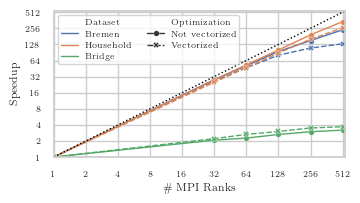

In [101]:
fig, axs = plt.subplots(1, 1, figsize=(figSize[0], figSize[1]))
filter = mpi_scaling_df["Workers"].isin(power_2)
sns.lineplot(data=mpi_scaling_df[filter], x="Workers", y="Speedup", hue="Dataset", style="Optimization", markers=True, ax=axs, linewidth=1, **custom_markers)

ticks=[2**x for x in range(0, 11)]
plt.plot(ticks, ticks, linestyle=':', color="black", linewidth=1)
plt.yscale('log', base=2)
plt.xscale('log', base=2)

axs.set_xlabel("\# MPI Ranks")
axs.set_xticks(ticks)
axs.set_yticks(ticks)
axs.set_xticklabels(ticks)
axs.set_yticklabels(ticks)
axs.set_xlim(1, 540)
axs.set_ylim(1, 540)


plt.legend(ncols=2, loc='upper left')
plt.tight_layout()
plt.savefig("../plots/mpi_scaling.pgf", backend="pgf", dpi=1200)

In [73]:
hybrid_scaling_df[hybrid_scaling_df["Dataset"] == "Bremen"]

,Dataset,Workers,Runtime [$s$],Std $\sigma$,Speedup,Optimization,log runtime
15,Bremen,1,582.800055,5.190723,2.663104,Not vectorized,2.765520
16,Bremen,2,308.737746,2.529882,5.027106,Not vectorized,2.489590
17,Bremen,4,194.442492,1.570507,7.982090,Not vectorized,2.288791
18,Bremen,6,140.875677,1.257072,11.017213,Not vectorized,2.148836
19,Bremen,8,109.281059,0.546364,14.202438,Not vectorized,2.038545
20,Bremen,12,80.085245,0.917472,19.380067,Not vectorized,1.903553
21,Bremen,16,64.252770,0.502645,24.155494,Not vectorized,1.807892
22,Bremen,20,54.578332,0.531540,28.437245,Not vectorized,1.737020
23,Bremen,24,48.866584,0.435360,31.761119,Not vectorized,1.689012
24,Bremen,28,43.867427,0.378528,35.380634,Not vectorized,1.642142


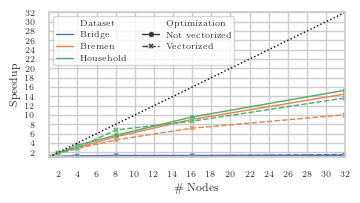

In [102]:
hybrid_scaling_df[hybrid_scaling_df["Dataset"] == "Bremen"]
fig, axs = plt.subplots(1, 1, figsize=(figSize[0], figSize[1]))
filter = hybrid_scaling_df["Workers"].isin(power_2)
sns.lineplot(data=hybrid_scaling_df[filter], x="Workers", y="Speedup", hue="Dataset", style="Optimization", markers=True, ax=axs, **custom_markers)

ticks=[2*x for x in range(0, 32)]
plt.plot(ticks, ticks, linestyle=':', color="black", linewidth=1)
#plt.yscale('log', base=2)
#plt.xscale('log', base=2)

axs.set_xlabel("\# Nodes")
axs.set_xticks(ticks)
axs.set_yticks(ticks)
axs.set_xticklabels(ticks)
axs.set_yticklabels(ticks)
axs.set_xlim(1, 32)
axs.set_ylim(1, 32)

plt.legend(loc='upper left', ncols=2)
plt.tight_layout()
plt.savefig("../plots/hybrid_scaling.pgf", backend="pgf", dpi=1200)

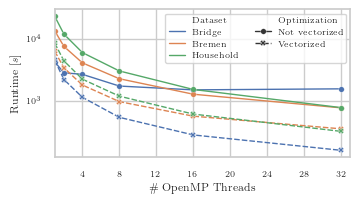

In [103]:
fig, axs = plt.subplots(1, 1, figsize=(figSize[0], figSize[1]))
filter = openmp_scaling_df["Workers"].isin(power_2)
sns.lineplot(data=openmp_scaling_df[filter], x="Workers", y="Runtime [$s$]", hue="Dataset", style="Optimization", markers=True, ax=axs, **custom_markers)

plt.yscale('log', base=10, subs=[2, 4, 6, 8])

xticks = range(0, 50, 4)
axs.set_xlabel("\# OpenMP Threads")
axs.set_xticks(xticks)
axs.set_xlim(1, 33)

axs.legend(loc='upper right', ncols=2)
plt.tight_layout()
plt.savefig("../plots/openmp_runtime.pgf", backend="pgf", dpi=1200)

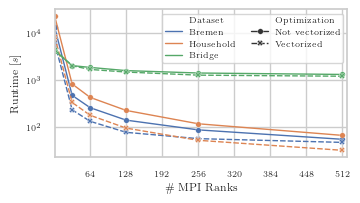

In [104]:
fig, axs = plt.subplots(1, 1, figsize=(figSize[0], figSize[1]))
filter=mpi_scaling_df["Workers"].isin(power_2)
sns.lineplot(data=mpi_scaling_df[filter], x="Workers", y="Runtime [$s$]", hue="Dataset", style="Optimization", markers=True, ax=axs, **custom_markers)

plt.yscale('log', base=10)

ticks=range(0, 520, 64)
axs.set_xlabel("\# MPI Ranks")
axs.set_xticks(ticks)
axs.set_xlim(1, 520)

plt.legend(loc='upper right', ncols=2)
plt.tight_layout()
plt.savefig("../plots/mpi_runtime.pgf", backend="pgf", dpi=1200)

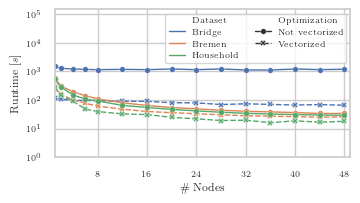

In [110]:
fig, axs = plt.subplots(1, 1, figsize=(figSize[0], figSize[1]))
# filter = hybrid_scaling_df["Workers"].isin(power_2)
sns.lineplot(data=hybrid_scaling_df, x="Workers", y="Runtime [$s$]", hue="Dataset", style="Optimization", markers=True, ax=axs, **custom_markers)
plt.yscale('log', base=10)

ticks=range(0, 50, 8)
axs.set_xlabel("\# Nodes")
axs.set_xticks(ticks)
axs.set_xlim(1, 49)
axs.set_ylim(1, 150000)

plt.legend(loc='upper right', ncols=2)
plt.tight_layout()
plt.savefig("../plots/hybrid_runtime.pgf", backend="pgf", dpi=1200)

Plots with different symbols for each dataset

[<matplotlib.lines.Line2D object at 0x000001512578E2E0>, <matplotlib.lines.Line2D object at 0x000001512578E5B0>, <matplotlib.lines.Line2D object at 0x000001512578E820>]


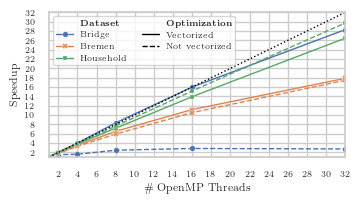

In [112]:
from matplotlib.lines import Line2D

power_2 = [2**x for x in range(10)]
fig, axs = plt.subplots(1, 1, figsize=(figSize[0], figSize[1] ))
filter = openmp_scaling_df["Workers"].isin(power_2) & openmp_scaling_df["Optimization"].isin(["Vectorized"])
sns.lineplot(data=openmp_scaling_df[filter],
             x="Workers",
             y="Speedup",
             hue="Dataset",
             style="Dataset",
             dashes=False,
             markers=True,
             ax=axs,
             **custom_markers,
             estimator=None,
             legend="brief"
            )

handles, labels = axs.get_legend_handles_labels()
line_styles = [handle.get_linestyle() for handle in handles]
marker_styles = [handle.get_marker() for handle in handles]
print(handles)

filter = openmp_scaling_df["Workers"].isin(power_2) & openmp_scaling_df["Optimization"].isin(["Not vectorized"])
sns.lineplot(data=openmp_scaling_df[filter],
             x="Workers",
             y="Speedup",
             hue="Dataset",
             style="Dataset",
            #  dashes={"Bremen":"r--", "Bridge": "g--", "Household":"b--"},
             linestyle="--",
             dashes=False,
             markers=True,
             ax=axs,
             **custom_markers,
             legend="brief",
             estimator=None)


#ticks=[2**x for x in range(0, 8)]
ticks=[2*x for x in range(0, 48)]
plt.plot(ticks, ticks, linestyle=':', color="black", linewidth=1)
#plt.yscale('log', base=2)
#plt.xscale('log', base=2)

axs.set_xlabel("\# OpenMP Threads")
axs.set_xticks(ticks)
axs.set_yticks(ticks)
axs.set_xticklabels(ticks)
axs.set_yticklabels(ticks)
axs.set_xlim(1, 32)
axs.set_ylim(1, 32)

# Extract line and marker styles from seaborn lineplots

# Plot legend with exact line and marker styles
handles = [Line2D([0], [0], color='black', linestyle='', linewidth=1)] + handles
handles += [Line2D([0], [0], color='black', linestyle='', linewidth=1)]
handles += [Line2D([0], [0], color='black', linestyle='-', linewidth=1)]
handles += [Line2D([0], [0], color='black', linestyle='--', linewidth=1)]
labels = ["$\\textbf{Dataset}$"] + labels
labels += ["$\\textbf{Optimization}$", "Vectorized", "Not vectorized"]

axs.legend(handles=handles, labels=labels, loc='upper left', ncol=2)


# plt.legend(ncols=2, loc='upper left', )
plt.tight_layout()
plt.savefig("openmp_scaling.pgf", backend="pgf", dpi=1200)

[<matplotlib.lines.Line2D object at 0x000001512AFCB0A0>, <matplotlib.lines.Line2D object at 0x000001512AFCB310>, <matplotlib.lines.Line2D object at 0x000001512AFCB580>]


,Dataset,Workers,Runtime [$s$],Std $\sigma$,Speedup,Optimization,log runtime
0,Bremen,1,13331.088110,29.782250,1.000000,Not vectorized,4.124866
1,Bremen,32,475.681965,1.112840,28.025212,Not vectorized,2.677317
2,Bremen,64,260.246466,0.650739,51.224857,Not vectorized,2.415385
3,Bremen,96,183.356602,0.564668,72.705798,Not vectorized,2.263297
4,Bremen,128,141.543904,0.382023,94.183414,Not vectorized,2.150891
...,...,...,...,...,...,...,...
49,Bridge,416,1252.056810,0.000000,3.576020,Vectorized,3.097624
50,Bridge,448,1228.969420,0.000000,3.643199,Vectorized,3.089541
51,Bridge,480,1208.280134,0.000000,3.705581,Vectorized,3.082168
52,Bridge,512,1213.016271,0.000000,3.691113,Vectorized,3.083867


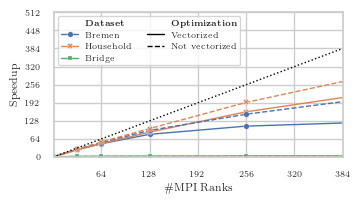

In [148]:
power_2 = [2**x for x in range(10)]
fig, axs = plt.subplots(1, 1, figsize=(figSize[0], figSize[1] ))
filter = mpi_scaling_df["Workers"].isin(power_2) & mpi_scaling_df["Optimization"].isin(["Vectorized"])
sns.lineplot(data=mpi_scaling_df[filter],
             x="Workers",
             y="Speedup",
             hue="Dataset",
             style="Dataset",
             dashes=False,
             markers=True,
             ax=axs,
             **custom_markers,
             estimator=None,
             legend="brief"
            )

handles, labels = axs.get_legend_handles_labels()
line_styles = [handle.get_linestyle() for handle in handles]
marker_styles = [handle.get_marker() for handle in handles]
print(handles)

filter = mpi_scaling_df["Workers"].isin(power_2) & mpi_scaling_df["Optimization"].isin(["Not vectorized"])
sns.lineplot(data=mpi_scaling_df[filter],
             x="Workers",
             y="Speedup",
             hue="Dataset",
             style="Dataset",
            #  dashes={"Bremen":"r--", "Bridge": "g--", "Household":"b--"},
             linestyle="--",
             dashes=False,
             markers=True,
             ax=axs,
             **custom_markers,
             legend="brief",
             estimator=None)


#ticks=[2**x for x in range(0, 8)]
#ticks=[2**x for x in range(0, 40)]
ticks=range(0, 520, 64)
plt.plot(ticks, ticks, linestyle=':', color="black", linewidth=1)
#plt.yscale('log', base=2)
#plt.xscale('log', base=2)

axs.set_xlabel("\#MPI Ranks")
axs.set_xticks(ticks)
axs.set_yticks(ticks)
axs.set_xticklabels(ticks)
axs.set_yticklabels(ticks)
axs.set_xlim(1, 384)
axs.set_ylim(0, 512)

# Extract line and marker styles from seaborn lineplots

# Plot legend with exact line and marker styles
handles = [Line2D([0], [0], color='black', linestyle='', linewidth=1)] + handles
handles += [Line2D([0], [0], color='black', linestyle='', linewidth=1)]
handles += [Line2D([0], [0], color='black', linestyle='-', linewidth=1)]
handles += [Line2D([0], [0], color='black', linestyle='--', linewidth=1)]
labels = ["$\\textbf{Dataset}$"] + labels
labels += ["$\\textbf{Optimization}$", "Vectorized", "Not vectorized"]

axs.legend(handles=handles, labels=labels, loc='upper left', ncol=2)


# plt.legend(ncols=2, loc='upper left', )
plt.tight_layout()
plt.savefig("mpi_scaling_new.pgf", backend="pgf", dpi=1200)
mpi_scaling_df

[<matplotlib.lines.Line2D object at 0x000001512643E1F0>, <matplotlib.lines.Line2D object at 0x000001512643E4F0>, <matplotlib.lines.Line2D object at 0x000001512643E760>]


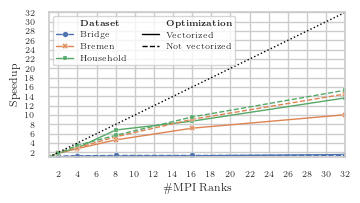

In [120]:
power_2 = [2**x for x in range(10)]
fig, axs = plt.subplots(1, 1, figsize=(figSize[0], figSize[1] ))
filter = hybrid_scaling_df["Workers"].isin(power_2) & hybrid_scaling_df["Optimization"].isin(["Vectorized"])
sns.lineplot(data=hybrid_scaling_df[filter],
             x="Workers",
             y="Speedup",
             hue="Dataset",
             style="Dataset",
             dashes=False,
             markers=True,
             ax=axs,
             **custom_markers,
             estimator=None,
             legend="brief"
            )

handles, labels = axs.get_legend_handles_labels()
line_styles = [handle.get_linestyle() for handle in handles]
marker_styles = [handle.get_marker() for handle in handles]
print(handles)

filter = hybrid_scaling_df["Workers"].isin(power_2) & hybrid_scaling_df["Optimization"].isin(["Not vectorized"])
sns.lineplot(data=hybrid_scaling_df[filter],
             x="Workers",
             y="Speedup",
             hue="Dataset",
             style="Dataset",
            #  dashes={"Bremen":"r--", "Bridge": "g--", "Household":"b--"},
             linestyle="--",
             dashes=False,
             markers=True,
             ax=axs,
             **custom_markers,
             legend="brief",
             estimator=None)


#ticks=[2**x for x in range(0, 8)]
ticks=[2*x for x in range(0, 48)]
plt.plot(ticks, ticks, linestyle=':', color="black", linewidth=1)
#plt.yscale('log', base=2)
#plt.xscale('log', base=2)

axs.set_xlabel("\#MPI Ranks")
axs.set_xticks(ticks)
axs.set_yticks(ticks)
axs.set_xticklabels(ticks)
axs.set_yticklabels(ticks)
axs.set_xlim(1, 32)
axs.set_ylim(1, 32)

# Extract line and marker styles from seaborn lineplots

# Plot legend with exact line and marker styles
handles = [Line2D([0], [0], color='black', linestyle='', linewidth=1)] + handles
handles += [Line2D([0], [0], color='black', linestyle='', linewidth=1)]
handles += [Line2D([0], [0], color='black', linestyle='-', linewidth=1)]
handles += [Line2D([0], [0], color='black', linestyle='--', linewidth=1)]
labels = ["$\\textbf{Dataset}$"] + labels
labels += ["$\\textbf{Optimization}$", "Vectorized", "Not vectorized"]

axs.legend(handles=handles, labels=labels, loc='upper left', ncol=2)


# plt.legend(ncols=2, loc='upper left', )
plt.tight_layout()
plt.savefig("hybrid_scaling_new.pgf", backend="pgf", dpi=1200)